
Clustering and hierarchical clustering are both unsupervised learning techniques used to group similar data points together based on certain characteristics or patterns. However, they differ in approach and use cases.

# 1. Clustering

Clustering is the process of dividing a dataset into distinct groups, or clusters, where data points in the same cluster are more similar to each other than to those in other clusters.

**Popular Methods:**

1. **K-means**: Partitions data into K clusters by minimizing the variance within each cluster.
2. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Groups data points based on density, which helps detect clusters of varying shapes and sizes. Also identifies outliers as noise.
3. **Gaussian Mixture Models (GMM)**: Assumes data is generated from a mixture of several Gaussian distributions and clusters by maximizing the likelihood of the data given these distributions.

**When to Use:** Clustering is useful for finding patterns in data when there are no predefined labels. It’s used in customer segmentation, image compression, and document clustering, among other applications.

**Limitations:** Many clustering methods, like K-means, struggle with clusters that are non-spherical or vary in density and size. Additionally, choosing the right number of clusters can be challenging.

# Importing Libraries and Mounting

In [26]:
import pandas as pd

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading Dataset

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Autumn 2024/Machine Learning/week 12/IRIS.csv')

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing

In [10]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


**Normalization**

In [11]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
numeric_columns = ['sepal_length', 'sepal_width',
       'petal_length', 'petal_width']

# Iterate over each column in the DataFrame
for col in numeric_columns:
  try:
    df[col] = pd.to_numeric(df[col].str.replace(',', '.'))
  except:
    pass

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


# Clustering

In [14]:
import pandas as pd
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(df[numeric_columns])

# Add cluster labels to the DataFrame
df['DBSCAN_Cluster'] = clusters

# Analyze the results (e.g., count the number of points in each cluster)
print(df['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
0    150
Name: count, dtype: int64


In [28]:
!pip install hdbscan

In [16]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5) # Adjust min_cluster_size as needed
clusterer.fit(df[numeric_columns])
df['HDBSCAN_cluster'] = clusterer.labels_
df

,sepal_length,sepal_width,petal_length,petal_width,species,DBSCAN_Cluster,HDBSCAN_cluster
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa,0,0
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa,0,0
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa,0,0
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa,0,0
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa,0,0
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica,0,1
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica,0,1
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica,0,1
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica,0,1


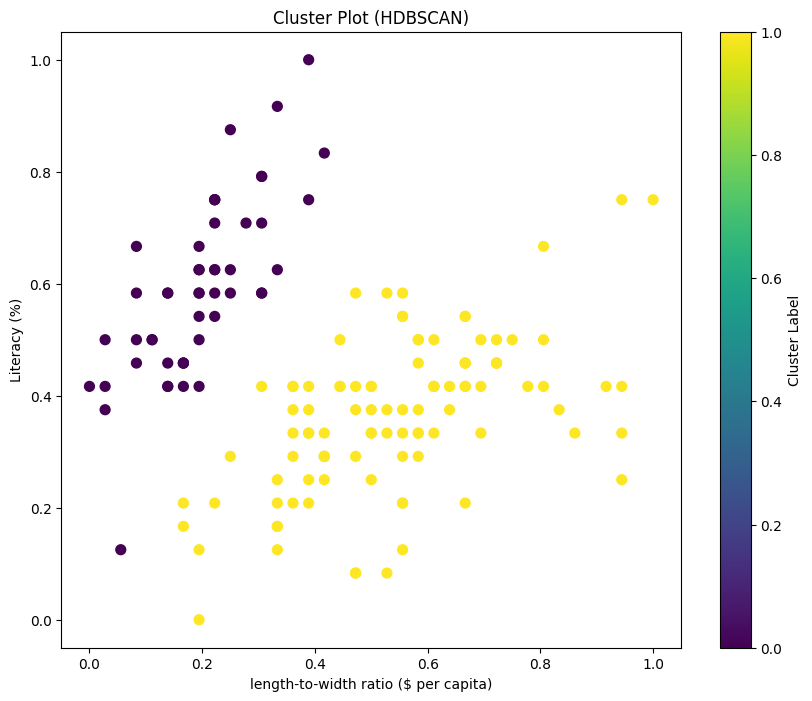

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['HDBSCAN_cluster'], cmap='viridis', s=50)
plt.xlabel('length-to-width ratio ($ per capita)')
plt.ylabel('Literacy (%)')
plt.title('Cluster Plot (HDBSCAN)')
plt.colorbar(label='Cluster Label')
plt.show()

In [20]:
unique_hdb_clusters = df['HDBSCAN_cluster'].unique()
unique_hdb_clusters

array([0, 1])

In [22]:
cluster_groups = df.groupby('HDBSCAN_cluster')

# Iterate through each cluster and print the countries
for cluster_label, cluster_data in cluster_groups:
    print(f"Cluster {cluster_label}:")
    countries = cluster_data['species'].tolist()
    print(countries)
    print()

Cluster 0:
['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa']

Cluster 1:
['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor

In [23]:
null_columns = df.columns[df.isnull().any()].tolist()
print(null_columns)
df.head()

[]


,sepal_length,sepal_width,petal_length,petal_width,species,DBSCAN_Cluster,HDBSCAN_cluster
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa,0,0
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa,0,0
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa,0,0
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa,0,0
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa,0,0


In [24]:
df_no_nulls = df.dropna(axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,DBSCAN_Cluster,HDBSCAN_cluster
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa,0,0
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa,0,0
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa,0,0
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa,0,0
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa,0,0


In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming your numeric data is in 'numeric_columns'
X = df[numeric_columns]

# Standardize the data (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a KMeans object with the desired number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust n_clusters and random_state

# Fit the model to the data
kmeans.fit(X_scaled)

# Get cluster labels for each data point
df['KMeans_Cluster'] = kmeans.labels_

# Analyze the clusters (e.g., print cluster centers, visualize)
# ...